# Preprocessing

In [1]:
# impirt important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
airline_data = pd.read_csv('../../data/dataset/airline.csv')
cache_map_data = pd.read_csv('../../data/dataset/cache_map.csv')
group_data = pd.read_csv('../../data/dataset/group.csv')
order_data = pd.read_csv('../../data/dataset/order.csv')

# lion_cache 保留
print('\n \n  !!!!!!!!!!!!!!!!!!!!!!!!!!!!  警告  !!!!!!!!!!!!!!!!!!!!!!!!　\n  \n  lion_cache data is ignored temporarily. \n \n ')

# test and train data
train_data = pd.read_csv('../../data/training-set.csv')
test_data = pd.read_csv('../../data/testing-set.csv')


 
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!  警告  !!!!!!!!!!!!!!!!!!!!!!!!　
  
  lion_cache data is ignored temporarily. 
 
 


/Users/kuanyao.huang/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## have a look of each dataset

### airline_data

In [3]:
airline_data.head(5)

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
0,63695,去程,2017/3/22 23:30,TPE 桃園機場,2017/3/22 14:15,HNL 檀香山機場
1,63695,回程,2017/4/1 14:30,LAX 洛杉機機場,2017/4/2 21:00,TPE 桃園機場
2,53481,去程,2017/5/17 23:00,TPE 桃園機場,2017/5/17 14:45,HNL 檀香山機場
3,53481,回程,2017/5/27 16:00,LAX 洛杉機機場,2017/5/28 21:05,TPE 桃園機場
4,54305,去程,2017/6/21 23:30,TPE 桃園機場,2017/6/21 14:15,HNL 檀香山機場


In [14]:
airline_data.describe()

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
count,104275,104275,104275,104275,104275,104275
unique,48796,2,60216,204,60377,207
top,9bcb042a7052030d5c8b27bf50cacaea,去程,2017/1/31 22:05,TPE 桃園機場,2018/2/17 11:15,TPE 桃園機場
freq,8,52223,10,40984,10,41125


In [16]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104275 entries, 0 to 104274
Data columns (total 6 columns):
group_id       104275 non-null object
go_back        104275 non-null object
fly_time       104275 non-null object
src_airport    104275 non-null object
arrive_time    104275 non-null object
dst_airport    104275 non-null object
dtypes: object(6)
memory usage: 4.8+ MB


### cache_map

In [4]:
cache_map_data.head(5)

,file_name,url
0,lion_cache_1.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
1,lion_cache_2.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
2,lion_cache_3.jpg,https://www.liontravel.com/Comm/2trs/hotsale/p...
3,lion_cache_4.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
4,lion_cache_5.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...


In [17]:
cache_map_data.describe()

,file_name,url
count,321,321
unique,321,321
top,lion_cache_70.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
freq,1,1


In [18]:
cache_map_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 2 columns):
file_name    321 non-null object
url          321 non-null object
dtypes: object(2)
memory usage: 5.1+ KB


### group_data

In [5]:
group_data.head(5)

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
0,63695,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
1,53481,subline_value_1,area_value_1,12.0,17-May-17,112900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
2,54305,subline_value_1,area_value_1,12.0,21-Jun-17,115900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
3,41766,subline_value_1,area_value_1,12.0,12-Jul-17,126900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
4,32196,subline_value_1,area_value_1,12.0,9-Aug-17,126900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...


In [19]:
group_data.describe()

,days,price
count,49223.000000,49223.000000
mean,6.245962,34705.866871
std,2.024880,20509.189141
min,2.000000,3000.000000
25%,5.000000,20900.000000
50%,5.000000,29900.000000
75%,8.000000,39900.000000
max,17.000000,222900.000000


In [6]:
order_data.head(5)

,order_id,group_id,order_date,source_1,source_2,unit,people_amount
0,136100,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2
1,140370,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1
2,211009,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2
3,41571,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4
4,64125,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1


In [20]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49223 entries, 0 to 49222
Data columns (total 8 columns):
group_id          49223 non-null object
sub_line          49223 non-null object
area              49223 non-null object
days              49223 non-null float64
begin_date        49223 non-null object
price             49223 non-null float64
product_name      49218 non-null object
promotion_prog    49167 non-null object
dtypes: float64(2), object(6)
memory usage: 3.0+ MB


### train_data

In [7]:
train_data.head(5)

,order_id,deal_or_not
0,136100,0
1,140370,0
2,211009,0
3,41571,1
4,64125,1


In [21]:
train_data.describe()

,order_id,deal_or_not
count,297020.000000,297020.000000
mean,156583.192866,0.197253
std,95659.738870,0.397925
min,1.000000,0.000000
25%,75101.750000,0.000000
50%,150249.500000,0.000000
75%,234075.250000,0.000000
max,340111.000000,1.000000


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297020 entries, 0 to 297019
Data columns (total 2 columns):
order_id       297020 non-null int64
deal_or_not    297020 non-null int64
dtypes: int64(2)
memory usage: 4.5 MB


### test_data

In [26]:
test_data.head(5)

,order_id,deal_or_not
0,3240332c374b21f9882f899f13b71308,NaN
1,bf0c0a570b848499180b9dbd49a12d76,NaN
2,0db30b8d4770f5145d932133e54a35a1,NaN
3,d3eaffe7c163fabadd8bff4aa28ee1c1,NaN
4,fefb2b6d55df4474e4826ddac2a97465,NaN


In [28]:
test_data['order_id'].describe()

count                                99895
unique                               99895
top       351e5f5595ed30361f14396e0c67de84
freq                                     1
Name: order_id, dtype: object

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99895 entries, 0 to 99894
Data columns (total 2 columns):
order_id        99895 non-null object
 deal_or_not    0 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


### Have a look of order_id (make sure we can have each order detail even there are two patterns of order_id

(array([9.00000e+00, 0.00000e+00, 9.00000e+01, 0.00000e+00, 8.90000e+02,
        0.00000e+00, 8.90000e+03, 0.00000e+00, 8.89760e+04, 1.98155e+05]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

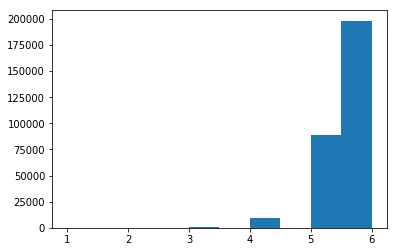

In [9]:
plt.hist(train_data.order_id.map(lambda x: len(str(x))))

(array([  9889., 287131.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  99895.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <a list of 10 Patch objects>)

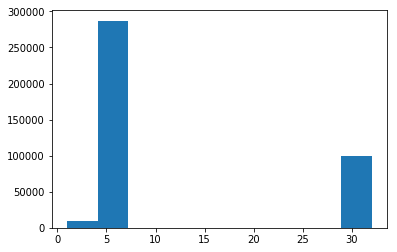

In [10]:
plt.hist(order_data.order_id.map(lambda x: len(str(x))))

In [11]:
order_data[order_data.order_id == '3240332c374b21f9882f899f13b71308']

,order_id,group_id,order_date,source_1,source_2,unit,people_amount
297020,3240332c374b21f9882f899f13b71308,6a073b14b4dd47028140bbc6b5100c55,17-Nov-17,src1_value_1,src2_value_1,unit_value_8,4
